## Machine Learning Algorithms

### Supervised Learning
- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machines

### Unsupervised Learning
- K-Means Clustering
- Hierarchical Clustering
- Principal Component Analysis

### Linear Regression

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [3]:
uri='https://github.com/ageron/data/raw/main/housing.tgz'

In [4]:
Path('datasets').mkdir(parents=True,exist_ok=True)

In [5]:
urllib.request.urlretrieve(uri,'datasets/housing.tgz')

('datasets/housing.tgz', <http.client.HTTPMessage at 0x244bf123620>)

In [6]:
with tarfile.open('datasets/housing.tgz') as housing_tarball:

    housing_tarball.extractall('datasets')

In [7]:
X = [0,2,4,7,8,10]
Y = [2,4,11,32,48,65,104]

In [8]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=Y))
fig.show()

In [9]:
m = (32-2)/7

In [10]:
m

4.285714285714286

In [11]:
y=(m*9)+2

In [12]:
y

40.57142857142857

In [13]:
housing_data = pd.read_csv('datasets/housing/housing.csv')

In [14]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train,test=train_test_split(housing_data,test_size=0.2,random_state=42)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [19]:
20640*0.8

16512.0

### Data Cleaning

In [20]:
train.loc[train['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,153800.0,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,59600.0,INLAND
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,125000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5569,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,<1H OCEAN
4835,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,58400.0,INLAND
504,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
19065,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,290100.0,<1H OCEAN


In [21]:
train.total_bedrooms.mean()

538.9234203926845

In [22]:
train.total_bedrooms.median()

437.0

In [23]:
train.total_bedrooms.fillna(train.total_bedrooms.median()).info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 14196 to 15795
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer=SimpleImputer(strategy='median')

In [26]:
numerical_cols=[x for x in list(train.columns) if x!='ocean_proximity']

In [27]:
numerical_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [28]:
train_imputed=pd.DataFrame(imputer.fit_transform(train[numerical_cols]),
                           columns=numerical_cols)

In [29]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


### Find the correlation of input features with target label

In [30]:
train_imputed.corr()['median_house_value']

longitude            -0.043603
latitude             -0.146324
housing_median_age    0.104714
total_rooms           0.134060
total_bedrooms        0.049950
population           -0.025820
households            0.065798
median_income         0.687013
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Handle Categorical Features

In [31]:
train['ocean_proximity'].unique()

array(['NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'ISLAND'],
      dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder()

In [34]:
train_cat_encoded=encoder.fit_transform(train[['ocean_proximity']])

In [35]:
train_cat_encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [36]:
train[['ocean_proximity']]

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
...,...
11284,NEAR BAY
11964,<1H OCEAN
5390,INLAND
860,INLAND


In [37]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [39]:
train_enc_features = pd.DataFrame(train_cat_encoded.toarray(),
                                  columns=list(encoder.get_feature_names_out()))

In [40]:
train_enc_features

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,0.0,0.0,1.0,0.0
16508,1.0,0.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,0.0,1.0,0.0,0.0,0.0


In [41]:
train_set_l1 = pd.concat([train_imputed,train_enc_features],axis=1)

In [42]:
train_set_l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   median_house_value          16512 non-null  float64
 9   ocean_proximity_<1H OCEAN   16512 non-null  float64
 10  ocean_proximity_INLAND      16512 non-null  float64
 11  ocean_proximity_ISLAND      16512 non-null  float64
 12  ocean_proximity_NEAR BAY    16512 non-null  float64
 13  ocean_proximity_NEAR OCEAN  165

### Model Training

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linearModel = LinearRegression()

In [45]:
linearModel.fit(X=train_set_l1[[x for x in list(train_set_l1.columns) if x!='median_house_value']],
                y=train_set_l1[['median_house_value']])

LinearRegression()

### Find out the accuracy of the current model

In [46]:
test_numeric_imputed=imputer.transform(test[numerical_cols])

In [47]:
test_numeric_imputed_df = pd.DataFrame(test_numeric_imputed,columns=numerical_cols)

In [48]:
test_numeric_imputed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0
1,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0
2,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0
3,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0
4,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0
...,...,...,...,...,...,...,...,...,...
4123,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0
4124,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0
4125,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0
4126,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0


### Encode categorical features on test set.

In [49]:
test_cat_encoded=encoder.transform(test[['ocean_proximity']])

In [50]:
test_cat_encoded_df = pd.DataFrame(test_cat_encoded.toarray(),
                                   columns=list(encoder.get_feature_names_out()))

In [51]:
test_cat_encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4123,0.0,1.0,0.0,0.0,0.0
4124,0.0,0.0,0.0,1.0,0.0
4125,0.0,1.0,0.0,0.0,0.0
4126,1.0,0.0,0.0,0.0,0.0


In [52]:
test_set_l1 = pd.concat([test_numeric_imputed_df,test_cat_encoded_df],axis=1)

In [53]:
test_set_l1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,0.0,1.0,0.0,0.0,0.0
1,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,1.0,0.0,0.0,0.0,0.0
2,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,0.0,0.0,0.0,0.0,1.0
3,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,1.0,0.0,0.0,0.0,0.0
4,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,0.0,1.0,0.0,0.0,0.0
4124,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,0.0,0.0,0.0,1.0,0.0
4125,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,0.0,1.0,0.0,0.0,0.0
4126,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,1.0,0.0,0.0,0.0,0.0


In [54]:
predictions = linearModel.predict(test_set_l1[[x for x in test_set_l1.columns if x !='median_house_value']])

In [55]:
predictions

array([[ 40760.37690827],
       [264870.25618901],
       [384166.49995454],
       ...,
       [184272.07214791],
       [385388.99318014],
       [244963.73676865]])

In [56]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [57]:
mse_score = mean_squared_error(test_set_l1['median_house_value'],predictions)

In [58]:
mse_score

4870819254.394041

In [59]:
rmse_score = root_mean_squared_error(test_set_l1['median_house_value'],predictions)

In [60]:
rmse_score

69791.25485613539

### Normalization Of Input Features

* Min-Max Method

* Standard Scaler

In [61]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [62]:
min_max_scaler=MinMaxScaler(feature_range=(-1,1))

In [63]:
train_norm_m1 =  min_max_scaler.fit_transform(train_imputed[[x for x in numerical_cols if x!='median_house_value']])

In [64]:
train_norm_m1_df = pd.DataFrame(train_norm_m1,columns=[x for x in numerical_cols if x!='median_house_value'])

In [65]:
train_norm_m1_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.420319,-0.955367,0.294118,-0.632245,-0.655493,-0.851397,-0.647755,-0.436160
1,0.458167,-0.968119,-0.647059,-0.944889,-0.949721,-0.961042,-0.945404,-0.425539
2,-0.585657,0.105207,0.058824,-0.576582,-0.518001,-0.833459,-0.512251,-0.560337
3,-0.496016,0.001063,-0.058824,-0.753625,-0.803538,-0.878080,-0.786548,-0.356367
4,0.667331,-0.834219,-0.725490,-0.985410,-0.986034,-0.996637,-0.992435,-0.866360
...,...,...,...,...,...,...,...,...
16507,-0.605578,0.147715,0.882353,-0.940720,-0.929236,-0.966591,-0.936195,-0.887339
16508,0.189243,-0.713071,0.333333,-0.891126,-0.897890,-0.959136,-0.897714,-0.162136
16509,0.000000,-0.205101,-0.411765,-0.839264,-0.836747,-0.939797,-0.829304,-0.775851
16510,0.426295,-0.672689,-0.176471,-0.848889,-0.828057,-0.912329,-0.837856,-0.702942


In [66]:
train_norm_df=pd.concat([train_norm_m1_df,train_enc_features],axis=1)

In [67]:
train_norm_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.420319,-0.955367,0.294118,-0.632245,-0.655493,-0.851397,-0.647755,-0.436160,0.0,0.0,0.0,0.0,1.0
1,0.458167,-0.968119,-0.647059,-0.944889,-0.949721,-0.961042,-0.945404,-0.425539,0.0,0.0,0.0,0.0,1.0
2,-0.585657,0.105207,0.058824,-0.576582,-0.518001,-0.833459,-0.512251,-0.560337,0.0,0.0,0.0,1.0,0.0
3,-0.496016,0.001063,-0.058824,-0.753625,-0.803538,-0.878080,-0.786548,-0.356367,1.0,0.0,0.0,0.0,0.0
4,0.667331,-0.834219,-0.725490,-0.985410,-0.986034,-0.996637,-0.992435,-0.866360,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.605578,0.147715,0.882353,-0.940720,-0.929236,-0.966591,-0.936195,-0.887339,0.0,0.0,0.0,1.0,0.0
16508,0.189243,-0.713071,0.333333,-0.891126,-0.897890,-0.959136,-0.897714,-0.162136,1.0,0.0,0.0,0.0,0.0
16509,0.000000,-0.205101,-0.411765,-0.839264,-0.836747,-0.939797,-0.829304,-0.775851,0.0,1.0,0.0,0.0,0.0
16510,0.426295,-0.672689,-0.176471,-0.848889,-0.828057,-0.912329,-0.837856,-0.702942,0.0,1.0,0.0,0.0,0.0


In [68]:
linearModelM1=LinearRegression()

In [69]:
linearModelM1.fit(X=train_norm_df,y=train[['median_house_value']])

LinearRegression()

In [70]:
train['median_house_value']

14196    291000.0
8267     156100.0
17445    353900.0
14265    241200.0
2271      53800.0
           ...   
11284     71600.0
11964    379300.0
5390     104200.0
860       84700.0
15795    251400.0
Name: median_house_value, Length: 16512, dtype: float64

In [71]:
train_norm_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.420319,-0.955367,0.294118,-0.632245,-0.655493,-0.851397,-0.647755,-0.436160,0.0,0.0,0.0,0.0,1.0
1,0.458167,-0.968119,-0.647059,-0.944889,-0.949721,-0.961042,-0.945404,-0.425539,0.0,0.0,0.0,0.0,1.0
2,-0.585657,0.105207,0.058824,-0.576582,-0.518001,-0.833459,-0.512251,-0.560337,0.0,0.0,0.0,1.0,0.0
3,-0.496016,0.001063,-0.058824,-0.753625,-0.803538,-0.878080,-0.786548,-0.356367,1.0,0.0,0.0,0.0,0.0
4,0.667331,-0.834219,-0.725490,-0.985410,-0.986034,-0.996637,-0.992435,-0.866360,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.605578,0.147715,0.882353,-0.940720,-0.929236,-0.966591,-0.936195,-0.887339,0.0,0.0,0.0,1.0,0.0
16508,0.189243,-0.713071,0.333333,-0.891126,-0.897890,-0.959136,-0.897714,-0.162136,1.0,0.0,0.0,0.0,0.0
16509,0.000000,-0.205101,-0.411765,-0.839264,-0.836747,-0.939797,-0.829304,-0.775851,0.0,1.0,0.0,0.0,0.0
16510,0.426295,-0.672689,-0.176471,-0.848889,-0.828057,-0.912329,-0.837856,-0.702942,0.0,1.0,0.0,0.0,0.0


In [72]:
test_m1_numeric = pd.DataFrame(columns=[x for x in numerical_cols if x!='median_house_value'],
                       data=min_max_scaler.transform(test_numeric_imputed_df[[x for x in numerical_cols if x!='median_house_value']]))

In [73]:
test_m1_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.607570,0.727949,-0.647059,-0.860291,-0.862508,-0.928754,-0.856274,-0.763852
1,0.191235,-0.725824,0.333333,-0.926130,-0.936065,-0.966479,-0.930275,-0.416436
2,0.416335,-0.961743,0.490196,-0.810759,-0.866543,-0.934303,-0.858247,-0.021724
3,0.177291,-0.679065,-0.333333,-0.707096,-0.630354,-0.894448,-0.659595,-0.452766
4,0.177291,-0.651435,0.254902,-0.869732,-0.871819,-0.940974,-0.871732,-0.465511
...,...,...,...,...,...,...,...,...
4123,-0.515936,0.696068,-0.529412,-0.719295,-0.726878,-0.899325,-0.758921,-0.751810
4124,-0.547809,0.092455,-0.019608,-0.840307,-0.788641,-0.921635,-0.800691,-0.702570
4125,0.065737,-0.394261,0.607843,-0.826084,-0.840161,-0.932734,-0.840158,-0.548848
4126,0.280876,-0.768332,0.490196,-0.910069,-0.930168,-0.969170,-0.926328,0.013738


In [74]:
test_m1_all = pd.concat([test_m1_numeric,test_cat_encoded_df],axis=1)

In [75]:
predictionsM1=linearModelM1.predict(test_m1_all)

In [76]:
mse_score_m1 = mean_squared_error()

TypeError: missing a required argument: 'y_true'

In [77]:
mse_score = mean_squared_error(test_set_l1['median_house_value'],predictionsM1)

In [78]:
mse_score

4869944321.514777

In [79]:
rmse_score_m1 = root_mean_squared_error(test['median_house_value'],predictionsM1)

In [80]:
rmse_score_m1

69784.98636178685

In [81]:
rmse_score

69791.25485613539

### Feature Engineering To Improve Model's Accuracy

In [98]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

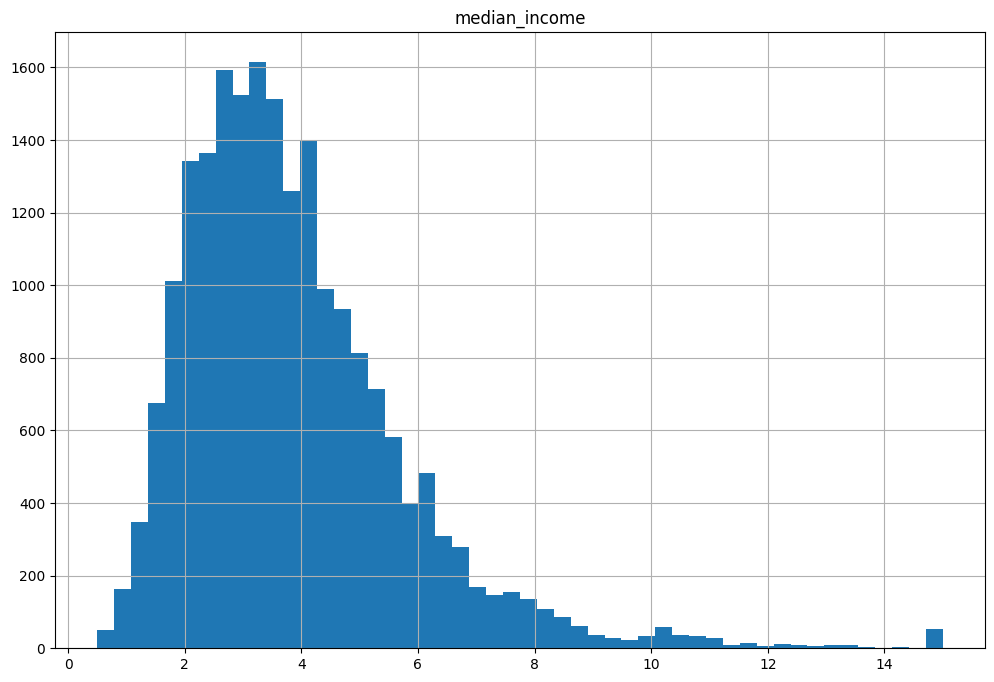

In [82]:
housing_data[["median_income"]].hist(bins=50,figsize=(12,8))

In [83]:
import numpy as np

In [84]:
housing_data.loc[:,'income_category']=pd.cut(housing_data['median_income'],
                                             bins=[0,1.5,3.0,4.5,6,np.inf],
                                             labels=[1,2,3,4,5])

In [87]:
housing_data['income_category']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_category, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [89]:
housing_data[numerical_cols+['income_category']].corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
income_category       0.643892
Name: median_house_value, dtype: float64

In [90]:
strat_train_set, strat_test_set = train_test_split(housing_data,test_size=0.2,
                                                   stratify=housing_data['income_category'])

In [91]:
strat_train_set.income_category.value_counts()/len(strat_train_set)

income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [92]:
strat_test_set.income_category.value_counts()/len(strat_test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [99]:
import matplotlib.image as mpimg

In [101]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


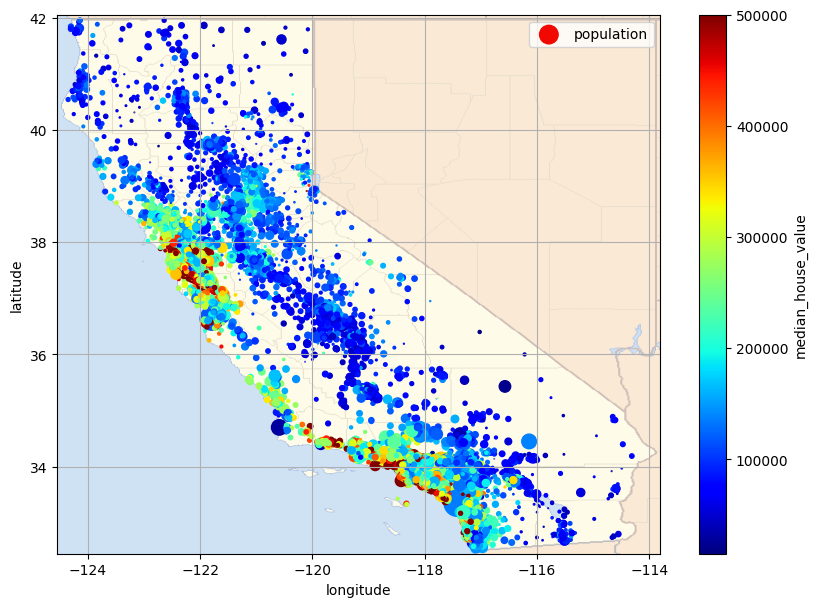

In [104]:
california_img = mpimg.imread('images/california.png')

housing_data.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  grid=True,
                  s=housing_data['population']/100,
                  label='population',
                  c='median_house_value',
                  cmap='jet',colorbar=True,
                  legend=True,
                  sharex=False,figsize=(10,7))

plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],
           alpha=0.5,cmap='jet')

plt.show()

In [106]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

In [133]:
class ClusterSimilarity(BaseEstimator,TransformerMixin):

    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):

        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    
    def fit(self,X,y=None,sample_weight=None):

        self.kmeans_=KMeans(n_clusters=self.n_clusters,random_state=self.random_state)

        self.kmeans_.fit(X,sample_weight=sample_weight)

        return self
    
    def transform(self,X):

        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    
    def get_features_names_out(self,names=None):

        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [134]:
age_simil_35 =rbf_kernel(housing_data[['housing_median_age']],[[35]],gamma=0.1)

In [135]:
housing_data[['housing_median_age']]

,housing_median_age
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [136]:
pd.DataFrame(data=age_simil_35,columns=['age_smilarity_35'])["age_smilarity_35"][0]

0.02732372244729256

In [137]:
round(pd.DataFrame(data=age_simil_35,columns=['age_smilarity_35'])["age_smilarity_35"][1],5)

0.0

In [138]:
cluster_similarity = ClusterSimilarity(n_clusters=10,
                                       gamma=1,
                                       random_state=42)

In [139]:
similarities = cluster_similarity.fit_transform(strat_train_set[['latitude','longitude']],
                                                sample_weight=strat_train_set['median_house_value'])

In [140]:
cluster_similarity.kmeans_.cluster_centers_

array([[  33.85639761, -117.81657936],
       [  37.26024327, -121.93872749],
       [  35.53063829, -118.85411131],
       [  38.45510617, -121.15128299],
       [  32.95439151, -117.03400745],
       [  40.13188076, -122.7950667 ],
       [  34.69680181, -120.01664181],
       [  37.87566711, -122.33826649],
       [  36.76731112, -119.72205416],
       [  34.06705823, -118.369748  ]])

In [141]:
similarities[0]

array([8.61427722e-01, 5.74746710e-12, 3.37607049e-02, 7.02242532e-14,
       1.23488836e-01, 2.97125141e-27, 1.67961615e-02, 2.42026687e-15,
       1.56923392e-05, 9.09469951e-01])

In [126]:
strat_train_set.loc[:,'cluster_similarity']=similarities.max(axis=1)

In [127]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,cluster_similarity
10605,-118.20,33.81,47.0,2347.0,437.0,1219.0,420.0,5.3096,209900.0,NEAR OCEAN,4,0.909470
14383,-118.16,33.89,46.0,940.0,219.0,599.0,214.0,3.2813,190900.0,<1H OCEAN,3,0.927425
4989,-118.40,34.01,48.0,1427.0,253.0,693.0,268.0,5.7405,351600.0,<1H OCEAN,4,0.995838
7101,-122.42,37.74,52.0,1271.0,353.0,1076.0,324.0,2.9911,263900.0,NEAR BAY,2,0.975226
14567,-122.54,37.74,42.0,2006.0,415.0,1230.0,435.0,4.1786,271100.0,NEAR OCEAN,3,0.942611
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,-121.84,38.02,46.0,66.0,22.0,37.0,21.0,0.5360,87500.0,INLAND,1,0.764066
13975,-116.57,33.64,10.0,489.0,82.0,183.0,74.0,6.2702,345500.0,INLAND,5,0.503908
3862,-122.10,37.37,37.0,2511.0,354.0,945.0,348.0,8.3924,500001.0,NEAR BAY,5,0.962660
10138,-122.19,37.80,52.0,1813.0,271.0,637.0,277.0,4.0114,263400.0,NEAR BAY,3,0.972672


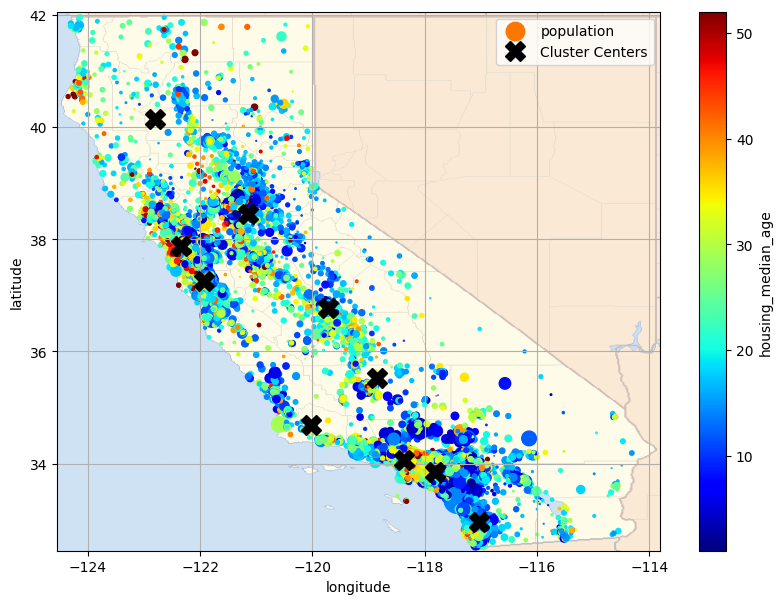

In [128]:
california_img = mpimg.imread('images/california.png')

housing_data.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  grid=True,
                  s=housing_data['population']/100,
                  label='population',
                  c='housing_median_age',
                  cmap='jet',colorbar=True,
                  legend=True,
                  sharex=False,figsize=(10,7))


plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],
           alpha=0.5,cmap='jet')

plt.plot(cluster_similarity.kmeans_.cluster_centers_[:,1],
         cluster_similarity.kmeans_.cluster_centers_[:,0],
         linestyle='',color='black',marker='X',markersize=15,
         label='Cluster Centers'
          )

plt.legend(loc='upper right')


plt.show()

In [142]:
cluster_simil_train=cluster_similarity.transform(strat_train_set[['latitude','longitude']])

In [143]:
cluster_train_df=pd.DataFrame(cluster_simil_train,
                              columns=cluster_similarity.get_features_names_out())

In [144]:
cluster_train_df

,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,8.614277e-01,5.747467e-12,3.376070e-02,7.022425e-14,1.234888e-01,2.971251e-27,1.679616e-02,2.420267e-15,1.569234e-05,9.094700e-01
1,8.877484e-01,7.342651e-12,4.185749e-02,1.156777e-13,1.172763e-01,5.611841e-27,1.660506e-02,3.304626e-15,2.212212e-05,9.274245e-01
2,6.949097e-01,9.409901e-11,8.057572e-02,1.353230e-12,5.078039e-02,2.161045e-25,4.571963e-02,5.946877e-14,8.691397e-05,9.958379e-01
3,1.763874e-16,6.301548e-01,2.279234e-08,1.199093e-01,2.853347e-23,2.846205e-03,2.947360e-07,9.752261e-01,2.678629e-04,1.039317e-13
4,5.759649e-17,5.533884e-01,9.546850e-09,8.716854e-02,7.721739e-24,3.069770e-03,1.631833e-07,9.426106e-01,1.381815e-04,3.875553e-14
...,...,...,...,...,...,...,...,...,...,...
16507,2.760130e-15,5.560053e-01,2.733664e-07,5.149690e-01,6.678666e-22,4.643937e-03,5.753534e-07,7.640657e-01,2.346280e-03,9.633135e-13
16508,2.017375e-01,6.170134e-19,1.519928e-04,6.542377e-20,5.039078e-01,7.367601e-36,2.269004e-06,5.729813e-23,2.739418e-09,3.266433e-02
16509,4.679060e-14,9.626596e-01,9.016451e-07,1.252405e-01,2.434699e-20,3.001876e-04,1.026911e-05,7.316375e-01,2.434874e-03,1.655713e-11
16510,8.693308e-16,7.015415e-01,8.520924e-08,2.213307e-01,1.808850e-22,3.016152e-03,5.840234e-07,9.726719e-01,7.792310e-04,4.073191e-13


In [147]:
strat_train_set.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,cluster_similarity
0,10605,-118.20,33.81,47.0,2347.0,437.0,1219.0,420.0,5.3096,209900.0,NEAR OCEAN,4,0.909470
1,14383,-118.16,33.89,46.0,940.0,219.0,599.0,214.0,3.2813,190900.0,<1H OCEAN,3,0.927425
2,4989,-118.40,34.01,48.0,1427.0,253.0,693.0,268.0,5.7405,351600.0,<1H OCEAN,4,0.995838
3,7101,-122.42,37.74,52.0,1271.0,353.0,1076.0,324.0,2.9911,263900.0,NEAR BAY,2,0.975226
4,14567,-122.54,37.74,42.0,2006.0,415.0,1230.0,435.0,4.1786,271100.0,NEAR OCEAN,3,0.942611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1983,-121.84,38.02,46.0,66.0,22.0,37.0,21.0,0.5360,87500.0,INLAND,1,0.764066
16508,13975,-116.57,33.64,10.0,489.0,82.0,183.0,74.0,6.2702,345500.0,INLAND,5,0.503908
16509,3862,-122.10,37.37,37.0,2511.0,354.0,945.0,348.0,8.3924,500001.0,NEAR BAY,5,0.962660
16510,10138,-122.19,37.80,52.0,1813.0,271.0,637.0,277.0,4.0114,263400.0,NEAR BAY,3,0.972672


In [148]:
strat_train_set_l1 = pd.concat([strat_train_set.reset_index(),cluster_train_df],axis=1)

In [151]:
strat_train_set_l1.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'cluster_similarity', 'Cluster 0 similarity', 'Cluster 1 similarity',
       'Cluster 2 similarity', 'Cluster 3 similarity', 'Cluster 4 similarity',
       'Cluster 5 similarity', 'Cluster 6 similarity', 'Cluster 7 similarity',
       'Cluster 8 similarity', 'Cluster 9 similarity'],
      dtype='object')

In [154]:
strat_train_set_l1.drop(columns=['cluster_similarity','latitude','longitude','median_income'],inplace=True)

In [150]:
imputer = SimpleImputer(strategy='median')

In [192]:
target_feature='median_house_value'
categorical_features=['ocean_proximity','income_category']

numerical_cols_updated=[x for x in strat_train_set_l1.columns if x not in categorical_features+[target_feature,'index']]

In [193]:
strat_train_imputed= imputer.fit_transform(strat_train_set_l1[numerical_cols_updated])

In [194]:
strat_train_imputed_df = pd.DataFrame(strat_train_imputed,columns=numerical_cols_updated)

In [195]:
strat_train_imputed_df

,housing_median_age,total_rooms,total_bedrooms,population,households,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,47.0,2347.0,437.0,1219.0,420.0,8.614277e-01,5.747467e-12,3.376070e-02,7.022425e-14,1.234888e-01,2.971251e-27,1.679616e-02,2.420267e-15,1.569234e-05,9.094700e-01
1,46.0,940.0,219.0,599.0,214.0,8.877484e-01,7.342651e-12,4.185749e-02,1.156777e-13,1.172763e-01,5.611841e-27,1.660506e-02,3.304626e-15,2.212212e-05,9.274245e-01
2,48.0,1427.0,253.0,693.0,268.0,6.949097e-01,9.409901e-11,8.057572e-02,1.353230e-12,5.078039e-02,2.161045e-25,4.571963e-02,5.946877e-14,8.691397e-05,9.958379e-01
3,52.0,1271.0,353.0,1076.0,324.0,1.763874e-16,6.301548e-01,2.279234e-08,1.199093e-01,2.853347e-23,2.846205e-03,2.947360e-07,9.752261e-01,2.678629e-04,1.039317e-13
4,42.0,2006.0,415.0,1230.0,435.0,5.759649e-17,5.533884e-01,9.546850e-09,8.716854e-02,7.721739e-24,3.069770e-03,1.631833e-07,9.426106e-01,1.381815e-04,3.875553e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,46.0,66.0,22.0,37.0,21.0,2.760130e-15,5.560053e-01,2.733664e-07,5.149690e-01,6.678666e-22,4.643937e-03,5.753534e-07,7.640657e-01,2.346280e-03,9.633135e-13
16508,10.0,489.0,82.0,183.0,74.0,2.017375e-01,6.170134e-19,1.519928e-04,6.542377e-20,5.039078e-01,7.367601e-36,2.269004e-06,5.729813e-23,2.739418e-09,3.266433e-02
16509,37.0,2511.0,354.0,945.0,348.0,4.679060e-14,9.626596e-01,9.016451e-07,1.252405e-01,2.434699e-20,3.001876e-04,1.026911e-05,7.316375e-01,2.434874e-03,1.655713e-11
16510,52.0,1813.0,271.0,637.0,277.0,8.693308e-16,7.015415e-01,8.520924e-08,2.213307e-01,1.808850e-22,3.016152e-03,5.840234e-07,9.726719e-01,7.792310e-04,4.073191e-13


In [196]:
strat_train_imputed_df.loc[:,'number_people_per_house']=strat_train_imputed_df['population']/strat_train_imputed_df['households']
strat_train_imputed_df.loc[:,'number_bedroom_per_house']=strat_train_imputed_df['total_bedrooms']/strat_train_imputed_df['households']

In [197]:
strat_train_imputed_df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'Cluster 0 similarity', 'Cluster 1 similarity',
       'Cluster 2 similarity', 'Cluster 3 similarity', 'Cluster 4 similarity',
       'Cluster 5 similarity', 'Cluster 6 similarity', 'Cluster 7 similarity',
       'Cluster 8 similarity', 'Cluster 9 similarity',
       'number_people_per_house', 'number_bedroom_per_house'],
      dtype='object')

In [198]:
cols_training_input=['housing_median_age', 'Cluster 0 similarity',
       'Cluster 1 similarity', 'Cluster 2 similarity', 'Cluster 3 similarity',
       'Cluster 4 similarity', 'Cluster 5 similarity', 'Cluster 6 similarity',
       'Cluster 7 similarity', 'Cluster 8 similarity', 'Cluster 9 similarity',
       'number_people_per_house', 'number_bedroom_per_house']

In [199]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

train_norm_m1 = min_max_scaler.fit_transform(strat_train_imputed_df[cols_training_input])

In [200]:
train_norm_m1_df= pd.DataFrame(train_norm_m1,columns=cols_training_input)

In [201]:
train_norm_m1_df

,housing_median_age,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity,number_people_per_house,number_bedroom_per_house
0,0.803922,0.722946,-1.000000,-0.931935,-1.000000,-0.753011,-1.000000,-0.966371,-1.000000,-0.999969,0.818956,-0.996443,-0.945838
1,0.764706,0.775590,-1.000000,-0.915611,-1.000000,-0.765436,-1.000000,-0.966754,-1.000000,-0.999956,0.854865,-0.996609,-0.946846
2,0.843137,0.389893,-1.000000,-0.837551,-1.000000,-0.898434,-1.000000,-0.908462,-1.000000,-0.999826,0.991693,-0.996952,-0.951521
3,1.000000,-1.000000,0.260312,-1.000000,-0.760020,-1.000000,-0.994267,-0.999999,0.950495,-0.999464,-1.000000,-0.995769,-0.942950
4,0.607843,-1.000000,0.106779,-1.000000,-0.825545,-1.000000,-0.993817,-1.000000,0.885262,-0.999724,-1.000000,-0.996563,-0.950932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.764706,-1.000000,0.112013,-0.999999,0.030633,-1.000000,-0.990646,-0.999999,0.528165,-0.995307,-1.000000,-0.998279,-0.945417
16508,-0.647059,-0.596504,-1.000000,-0.999694,-1.000000,0.007864,-1.000000,-0.999995,-1.000000,-1.000000,-0.934671,-0.997134,-0.941854
16509,0.411765,-1.000000,0.925323,-0.999998,-0.749350,-1.000000,-0.999395,-0.999979,0.463307,-0.995130,-1.000000,-0.996744,-0.947207
16510,1.000000,-1.000000,0.403085,-1.000000,-0.557040,-1.000000,-0.993925,-0.999999,0.945386,-0.998441,-1.000000,-0.997413,-0.949499


In [202]:
linearModelStrat=LinearRegression()

In [172]:
strat_train_set_l1[[target_feature]]

,median_house_value
0,209900.0
1,190900.0
2,351600.0
3,263900.0
4,271100.0
...,...
16507,87500.0
16508,345500.0
16509,500001.0
16510,263400.0


In [203]:
# handling categorical features

encoder=OneHotEncoder()

train_cat_encoded=encoder.fit_transform(strat_train_set_l1[['ocean_proximity','income_category']])

In [204]:
train_cat_encoded.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [205]:
strat_enc_df=pd.DataFrame(train_cat_encoded.toarray(),
                          columns=encoder.get_feature_names_out())

In [206]:
train_complete_set = pd.concat([train_norm_m1_df,
                                strat_enc_df],axis=1)

In [207]:
train_complete_set

,housing_median_age,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_category_1,income_category_2,income_category_3,income_category_4,income_category_5
0,0.803922,0.722946,-1.000000,-0.931935,-1.000000,-0.753011,-1.000000,-0.966371,-1.000000,-0.999969,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.764706,0.775590,-1.000000,-0.915611,-1.000000,-0.765436,-1.000000,-0.966754,-1.000000,-0.999956,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.843137,0.389893,-1.000000,-0.837551,-1.000000,-0.898434,-1.000000,-0.908462,-1.000000,-0.999826,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,-1.000000,0.260312,-1.000000,-0.760020,-1.000000,-0.994267,-0.999999,0.950495,-0.999464,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607843,-1.000000,0.106779,-1.000000,-0.825545,-1.000000,-0.993817,-1.000000,0.885262,-0.999724,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.764706,-1.000000,0.112013,-0.999999,0.030633,-1.000000,-0.990646,-0.999999,0.528165,-0.995307,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16508,-0.647059,-0.596504,-1.000000,-0.999694,-1.000000,0.007864,-1.000000,-0.999995,-1.000000,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16509,0.411765,-1.000000,0.925323,-0.999998,-0.749350,-1.000000,-0.999395,-0.999979,0.463307,-0.995130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16510,1.000000,-1.000000,0.403085,-1.000000,-0.557040,-1.000000,-0.993925,-0.999999,0.945386,-0.998441,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [208]:
linearModelStrat.fit(X=train_complete_set,
                     y=strat_train_set_l1[target_feature])

LinearRegression()

In [209]:
cluster_similarity_test=cluster_similarity.transform(strat_test_set[['latitude','longitude']])

In [210]:
clus_simil_test_df=pd.DataFrame(cluster_similarity_test,
                                columns=cluster_similarity.get_features_names_out())

In [232]:
test_set_strat_clustered=pd.concat([strat_test_set.reset_index(drop=True),
                                    clus_simil_test_df],axis=1)

In [233]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
14148,-119.53,36.61,33.0,587.0,170.0,730.0,162.0,1.5625,55800.0,INLAND,2
20578,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,INLAND,2
12339,-117.54,34.55,5.0,2949.0,671.0,1620.0,530.0,2.9479,83300.0,INLAND,2
15193,-118.32,34.01,44.0,4032.0,913.0,1622.0,848.0,2.4934,165800.0,<1H OCEAN,2
1582,-118.28,33.73,52.0,2085.0,588.0,1767.0,516.0,2.1935,243200.0,NEAR OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
10176,-124.18,40.78,33.0,1076.0,222.0,656.0,236.0,2.5096,72200.0,NEAR OCEAN,2
12661,-117.89,33.88,15.0,1655.0,626.0,1549.0,582.0,1.9127,175000.0,<1H OCEAN,2
16127,-122.04,36.97,45.0,1302.0,245.0,621.0,258.0,5.1806,266400.0,NEAR OCEAN,4
17857,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682,235200.0,<1H OCEAN,3


In [234]:
len(clus_simil_test_df)

4128

In [236]:
test_set_strat_clustered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,-119.53,36.61,33.0,587.0,170.0,730.0,162.0,1.5625,55800.0,INLAND,...,2.704154e-05,1.979751e-03,1.975335e-01,2.398347e-03,3.095079e-09,9.622763e-11,2.029973e-02,7.573472e-05,9.402292e-01,4.045491e-04
1,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,INLAND,...,1.940276e-18,8.108948e-02,2.812610e-09,5.587510e-01,1.120904e-25,7.141036e-02,1.406411e-09,2.984946e-01,1.741564e-04,9.253988e-16
2,-117.54,34.55,5.0,2949.0,671.0,1620.0,530.0,2.9479,83300.0,INLAND,...,5.725928e-01,2.551800e-12,6.798012e-02,5.167490e-13,6.068887e-02,2.986475e-26,2.122193e-03,1.576730e-15,6.265739e-05,3.978364e-01
3,-118.32,34.01,44.0,4032.0,913.0,1622.0,848.0,2.4934,165800.0,<1H OCEAN,...,7.580348e-01,5.307740e-11,7.445088e-02,8.657915e-13,6.278205e-02,1.062879e-25,3.507418e-02,3.146666e-14,6.989472e-05,9.942859e-01
4,-118.28,33.73,52.0,2085.0,588.0,1767.0,516.0,2.1935,243200.0,NEAR OCEAN,...,7.939498e-01,5.942422e-12,2.810235e-02,5.287243e-14,1.160115e-01,2.225303e-27,1.924257e-02,2.417403e-15,1.231393e-05,8.854468e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-124.18,40.78,33.0,1076.0,222.0,656.0,236.0,2.5096,72200.0,NEAR OCEAN,...,3.940968e-39,2.742009e-08,5.174479e-25,4.663833e-07,1.684235e-49,9.651095e-02,2.517309e-24,7.303683e-06,2.378353e-16,5.858320e-35
4124,-117.89,33.88,15.0,1655.0,626.0,1549.0,582.0,1.9127,175000.0,<1H OCEAN,...,9.940700e-01,8.292632e-13,2.588433e-02,1.951558e-14,2.040328e-01,3.768550e-28,5.573285e-03,2.971096e-16,8.352180e-06,7.670917e-01
4125,-122.04,36.97,45.0,1302.0,245.0,621.0,258.0,5.1806,266400.0,NEAR OCEAN,...,1.104309e-12,9.098302e-01,4.922722e-06,5.001870e-02,1.298823e-18,2.573611e-05,9.502140e-05,4.028481e-01,4.453987e-03,3.089565e-10
4126,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682,235200.0,<1H OCEAN,...,4.110238e-13,9.951616e-01,4.190258e-06,1.561449e-01,3.310594e-19,1.534468e-04,3.237009e-05,5.939726e-01,6.775105e-03,1.124126e-10


In [237]:
test_strat_imputed=imputer.transform(test_set_strat_clustered[numerical_cols_updated])

In [238]:
test_strat_imputed_df = pd.DataFrame(test_strat_imputed,
                                     columns=numerical_cols_updated)

In [239]:
test_strat_imputed_df

,housing_median_age,total_rooms,total_bedrooms,population,households,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,33.0,587.0,170.0,730.0,162.0,2.704154e-05,1.979751e-03,1.975335e-01,2.398347e-03,3.095079e-09,9.622763e-11,2.029973e-02,7.573472e-05,9.402292e-01,4.045491e-04
1,37.0,352.0,65.0,238.0,67.0,1.940276e-18,8.108948e-02,2.812610e-09,5.587510e-01,1.120904e-25,7.141036e-02,1.406411e-09,2.984946e-01,1.741564e-04,9.253988e-16
2,5.0,2949.0,671.0,1620.0,530.0,5.725928e-01,2.551800e-12,6.798012e-02,5.167490e-13,6.068887e-02,2.986475e-26,2.122193e-03,1.576730e-15,6.265739e-05,3.978364e-01
3,44.0,4032.0,913.0,1622.0,848.0,7.580348e-01,5.307740e-11,7.445088e-02,8.657915e-13,6.278205e-02,1.062879e-25,3.507418e-02,3.146666e-14,6.989472e-05,9.942859e-01
4,52.0,2085.0,588.0,1767.0,516.0,7.939498e-01,5.942422e-12,2.810235e-02,5.287243e-14,1.160115e-01,2.225303e-27,1.924257e-02,2.417403e-15,1.231393e-05,8.854468e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,33.0,1076.0,222.0,656.0,236.0,3.940968e-39,2.742009e-08,5.174479e-25,4.663833e-07,1.684235e-49,9.651095e-02,2.517309e-24,7.303683e-06,2.378353e-16,5.858320e-35
4124,15.0,1655.0,626.0,1549.0,582.0,9.940700e-01,8.292632e-13,2.588433e-02,1.951558e-14,2.040328e-01,3.768550e-28,5.573285e-03,2.971096e-16,8.352180e-06,7.670917e-01
4125,45.0,1302.0,245.0,621.0,258.0,1.104309e-12,9.098302e-01,4.922722e-06,5.001870e-02,1.298823e-18,2.573611e-05,9.502140e-05,4.028481e-01,4.453987e-03,3.089565e-10
4126,40.0,1844.0,340.0,719.0,305.0,4.110238e-13,9.951616e-01,4.190258e-06,1.561449e-01,3.310594e-19,1.534468e-04,3.237009e-05,5.939726e-01,6.775105e-03,1.124126e-10


In [240]:
test_strat_imputed_df.loc[:,'number_people_per_house']=test_strat_imputed_df['population']/test_strat_imputed_df['households']

test_strat_imputed_df.loc[:,'number_bedroom_per_house']=test_strat_imputed_df['total_bedrooms']/test_strat_imputed_df['households']

In [241]:
test_strat_m2 = pd.DataFrame(columns=cols_training_input,data=min_max_scaler.transform(test_strat_imputed_df[cols_training_input]))

In [242]:
test_strat_m2

,housing_median_age,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity,number_people_per_house,number_bedroom_per_house
0,0.254902,-0.999946,-0.996040,-0.601753,-0.995200,-1.000000,-1.000000,-0.959357,-0.999849,0.880567,-0.999191,-0.993862,-0.945314
1,0.411765,-1.000000,-0.837821,-1.000000,0.118256,-1.000000,-0.856163,-1.000000,-0.402998,-0.999652,-1.000000,-0.995397,-0.949982
2,-0.843137,0.145246,-1.000000,-0.862945,-1.000000,-0.878616,-1.000000,-0.995751,-1.000000,-0.999875,-0.204320,-0.996195,-0.932549
3,0.686275,0.516149,-1.000000,-0.849899,-1.000000,-0.874430,-1.000000,-0.929776,-1.000000,-0.999860,0.988589,-0.998036,-0.943707
4,1.000000,0.587983,-1.000000,-0.943343,-1.000000,-0.767966,-1.000000,-0.961473,-1.000000,-0.999975,0.770909,-0.995603,-0.940002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.254902,-1.000000,-1.000000,-1.000000,-0.999999,-1.000000,-0.805605,-1.000000,-0.999985,-1.000000,-1.000000,-0.996640,-0.951718
4124,-0.450980,0.988245,-1.000000,-0.947815,-1.000000,-0.591915,-1.000000,-0.988841,-1.000000,-0.999983,0.534197,-0.996831,-0.943769
4125,0.725490,-1.000000,0.819663,-0.999990,-0.899895,-1.000000,-0.999948,-0.999810,-0.194286,-0.991092,-1.000000,-0.997240,-0.951192
4126,0.529412,-1.000000,0.990327,-0.999992,-0.687499,-1.000000,-0.999691,-0.999935,0.187971,-0.986449,-1.000000,-0.997320,-0.941462


In [243]:
test_strat_m2.columns

Index(['housing_median_age', 'Cluster 0 similarity', 'Cluster 1 similarity',
       'Cluster 2 similarity', 'Cluster 3 similarity', 'Cluster 4 similarity',
       'Cluster 5 similarity', 'Cluster 6 similarity', 'Cluster 7 similarity',
       'Cluster 8 similarity', 'Cluster 9 similarity',
       'number_people_per_house', 'number_bedroom_per_house'],
      dtype='object')

In [244]:
categorical_features

['ocean_proximity', 'income_category']

In [245]:
test_encoded_strat = encoder.transform(strat_test_set[categorical_features])

In [246]:
test_encoded_strat_df=pd.DataFrame(test_encoded_strat.toarray(),columns=encoder.get_feature_names_out())

In [247]:
test_encoded_strat_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_category_1,income_category_2,income_category_3,income_category_4,income_category_5
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4123,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4124,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [248]:
test_complete_strat=pd.concat([test_strat_m2,test_encoded_strat_df],axis=1)

In [249]:
test_complete_strat

,housing_median_age,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_category_1,income_category_2,income_category_3,income_category_4,income_category_5
0,0.254902,-0.999946,-0.996040,-0.601753,-0.995200,-1.000000,-1.000000,-0.959357,-0.999849,0.880567,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.411765,-1.000000,-0.837821,-1.000000,0.118256,-1.000000,-0.856163,-1.000000,-0.402998,-0.999652,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.843137,0.145246,-1.000000,-0.862945,-1.000000,-0.878616,-1.000000,-0.995751,-1.000000,-0.999875,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.686275,0.516149,-1.000000,-0.849899,-1.000000,-0.874430,-1.000000,-0.929776,-1.000000,-0.999860,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.000000,0.587983,-1.000000,-0.943343,-1.000000,-0.767966,-1.000000,-0.961473,-1.000000,-0.999975,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.254902,-1.000000,-1.000000,-1.000000,-0.999999,-1.000000,-0.805605,-1.000000,-0.999985,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4124,-0.450980,0.988245,-1.000000,-0.947815,-1.000000,-0.591915,-1.000000,-0.988841,-1.000000,-0.999983,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4125,0.725490,-1.000000,0.819663,-0.999990,-0.899895,-1.000000,-0.999948,-0.999810,-0.194286,-0.991092,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4126,0.529412,-1.000000,0.990327,-0.999992,-0.687499,-1.000000,-0.999691,-0.999935,0.187971,-0.986449,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [250]:
predictions = linearModelStrat.predict(test_complete_strat)

In [251]:
strat_test_set['median_house_value']

14148     55800.0
20578    275000.0
12339     83300.0
15193    165800.0
1582     243200.0
           ...   
10176     72200.0
12661    175000.0
16127    266400.0
17857    235200.0
10851    109300.0
Name: median_house_value, Length: 4128, dtype: float64

In [252]:
rmse_score = root_mean_squared_error(strat_test_set['median_house_value'],predictions)

In [253]:
rmse_score

72179.85766058376